# Image sizes
This Notebook investigates image sizes of the images in all datasets.

In [14]:
from os.path import join
from os import listdir

from tqdm import tqdm_notebook as tqdm

from PIL import Image
from matplotlib import pyplot as plt

import numpy as np

In [2]:
datadir = 'D:\\Documenten\\Radboud University\\2017-2018\\Semester 2\\Computing Science\\Machine Learning in Practice\\Fashion\\data\\'
images_path = join(datadir, 'images/')

In [3]:
def get_image_size(path):
    img = Image.open(path)
    return img.size

def get_img_sizes_per_folder(path, desc):
    return [get_image_size(join(path, f)) for f in tqdm(listdir(path), desc=desc)]

## Loading the sizes

In [5]:
# loading sizes per data folder
sizes_validation = get_img_sizes_per_folder(join(images_path, 'validation/'), 'Validation')
sizes_test = get_img_sizes_per_folder(join(images_path, 'test/'), 'Test')
sizes_train = get_img_sizes_per_folder(join(images_path, 'train/'), 'Training')

In [7]:
sizes = sizes_train + sizes_test + sizes_validation

In [129]:
unique, counts = np.unique(sizes, return_counts=True)

In [130]:
widths = [s[0] for s in sizes]
heights = [s[1] for s in sizes]

In [131]:
unique_widths, counts_width = np.unique(widths, return_counts=True)
print(len(counts_widths))
unique_heights, counts_height = np.unique(heights, return_counts=True)
print(len(counts_heights))

561
538


In [132]:
width_sorted = sorted(unique_widths)
min_width = width_sorted[0]
max_width = width_sorted[-1]

print('Minimum width:', min_width)
print('Maximum width:', max_width)

height_sorted = sorted(unique_heights)
min_height = height_sorted[0]
max_height = height_sorted[-1]

print('Minimum height:', min_height)
print('Maximum height:', max_height)

Minimum width: 27
Maximum width: 600
Minimum height: 32
Maximum height: 600


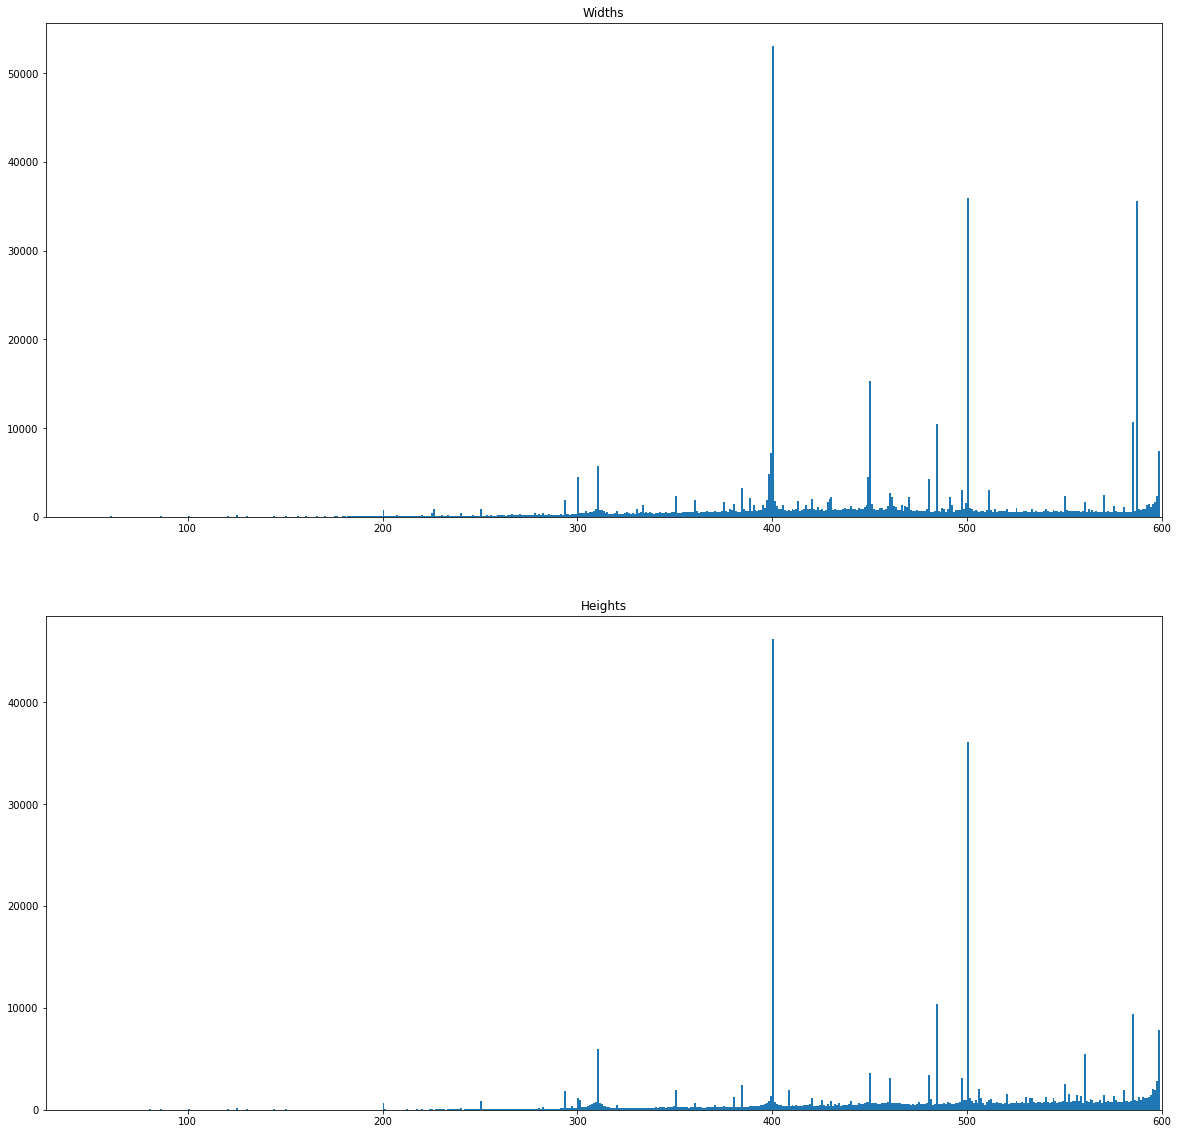

In [133]:
fig, (ax1, ax2) = plt.subplots(2, 1)

fig.set_figwidth(20)
fig.set_figheight(20)

ax1.hist(widths, bins=range(min_width, max_width))
ax1.set_xbound(min_width, max_width)
ax1.set_title('Widths')

ax2.hist(heights, bins=range(min_height, max_height))
ax2.set_xbound(min_width, max_width)
ax2.set_title('Heights')

plt.show()